In [115]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Directory where JSON files are stored
data_dir = 'results_error_bands'

# Initialize lists to store the data
x_values_GC = []
mean_latest_end_times = []
std_devs_latest_end_times = []

# Process each JSON file
for x in range(1, 6):  # Assuming you have files from results_1.json to results_10.json
    file_path = os.path.join(data_dir, f'results_pytorch_concurrent_{x}_globus-torch.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Collect latest end times for the current X value
    latest_end_times = []
    for iteration in data.values():
        end_times = [float(func_data['end_time']) for func_data in iteration.values()]
        latest_end_time = max(end_times)
        latest_end_times.append(latest_end_time)
    
    # Calculate mean and standard deviation of latest end times
    mean_latest_end_time = sum(latest_end_times) / len(latest_end_times)
    std_dev_latest_end_time = (sum((t - mean_latest_end_time) ** 2 for t in latest_end_times) / len(latest_end_times)) ** 0.5
    
    # Print the mean time with only 2 decimal places
    print(f'X = {x}: Mean latest end time = {mean_latest_end_time:.2f} ± {std_dev_latest_end_time:.2f}')
    
    # Append to the lists
    x_values_GC.append(x)
    mean_latest_end_times.append(mean_latest_end_time)
    std_devs_latest_end_times.append(std_dev_latest_end_time)

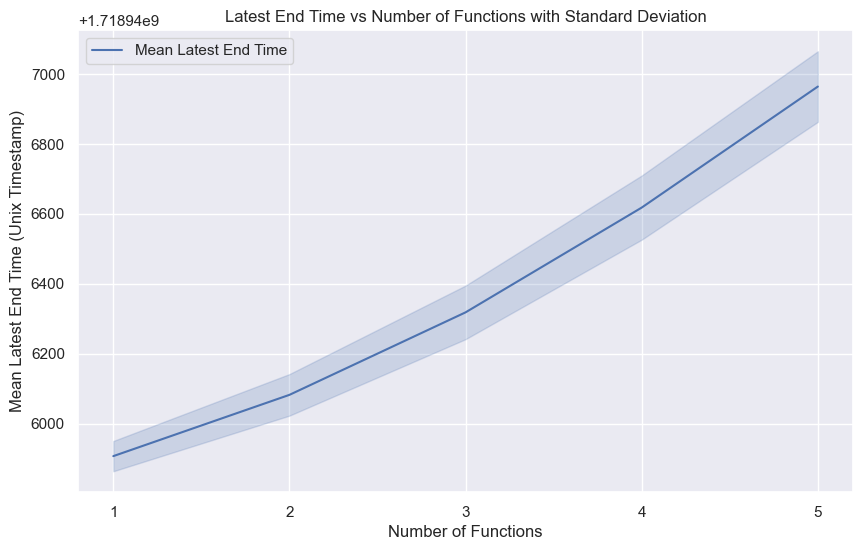

In [117]:
# let's have mean as np array
import numpy as np
mean_latest_end_times = np.array(mean_latest_end_times)
std_devs_latest_end_times = np.array(std_devs_latest_end_times)

# Plot the data with error bars
plt.figure(figsize=(10, 6))

x = np.arange(1, len(mean_latest_end_times) + 1)
plt.plot(x, mean_latest_end_times, 'b-', label='Mean Latest End Time')
plt.fill_between(x, mean_latest_end_times - std_devs_latest_end_times, mean_latest_end_times + std_devs_latest_end_times, color='b', alpha=0.2)

plt.xlabel('Number of Functions')
plt.ylabel('Mean Latest End Time (Unix Timestamp)')
plt.title('Latest End Time vs Number of Functions with Standard Deviation')
plt.xticks(ticks=range(1, 6))
plt.legend()
plt.show()

# Using the time difference between the first starting function and the last ending function

In [154]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Directory where JSON files are stored
data_dir = 'results_error_bands'

# Initialize lists to store the data
x_values_GC = []
mean_time_differences_GC = []
std_devs_time_differences_GC = []

# Process each JSON file
for x in range(1, 7):  
    file_path = os.path.join(data_dir, f'results_pytorch_concurrent_{x}_globus-torch.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Collect time differences for the current X value
    time_differences_GC = []
    for iteration in data.values():
        start_times = [float(func_data['start_time']) for func_data in iteration.values()]
        end_times = [float(func_data['end_time']) for func_data in iteration.values()]
        
        earliest_start_time = min(start_times)
        latest_end_time = max(end_times)
        
        time_difference = latest_end_time - earliest_start_time
        if time_difference < 0:
            print(f"Warning: Negative time difference detected for X = {x}, Iteration = {iteration}")
            
        time_differences_GC.append(time_difference)
    
    # Calculate mean and standard deviation of time differences
    mean_time_difference = np.mean(time_differences_GC)
    std_dev_time_difference = np.std(time_differences_GC, ddof=1)
    
    # Print the mean time difference with only 2 decimal places
    print(f'X = {x}: Mean time difference = {mean_time_difference:.2f} ± {std_dev_time_difference:.2f}')
    
    # Append to the lists
    x_values_GC.append(x)
    mean_time_differences_GC.append(mean_time_difference)
    std_devs_time_differences_GC.append(std_dev_time_difference)


X = 1: Mean time difference = 0.35 ± 0.08
X = 2: Mean time difference = 0.42 ± 0.10
X = 3: Mean time difference = 0.69 ± 2.14
X = 4: Mean time difference = 0.85 ± 2.55
X = 5: Mean time difference = 1.04 ± 2.42
X = 6: Mean time difference = 1.14 ± 2.64


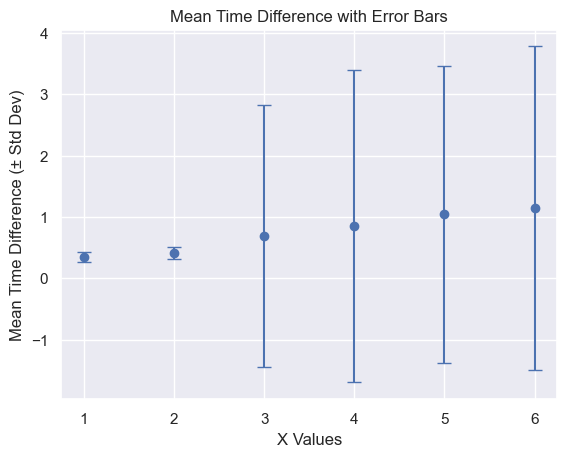

In [155]:
# Optional: Plotting the results
plt.errorbar(x_values_GC, mean_time_differences_GC, yerr=std_devs_time_differences_GC, fmt='o', capsize=5)
plt.xlabel('X Values')
plt.ylabel('Mean Time Difference (± Std Dev)')
plt.title('Mean Time Difference with Error Bars')
plt.show()

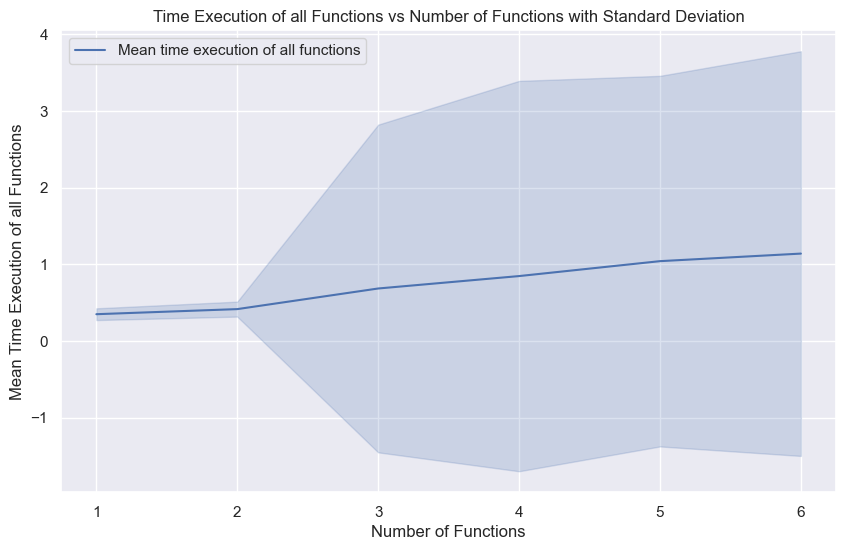

In [157]:
# let's have mean as np array
import numpy as np
mean_time_differences_GC = np.array(mean_time_differences_GC)
std_devs_time_differences_GC = np.array(std_devs_time_differences_GC)

# Plot the data with error bars
plt.figure(figsize=(10, 6))

x = np.arange(1, len(mean_time_differences_GC) + 1)
plt.plot(x, mean_time_differences_GC, 'b-', label='Mean time execution of all functions')
plt.fill_between(x, mean_time_differences_GC - std_devs_time_differences_GC, mean_time_differences_GC + std_devs_time_differences_GC, color='b', alpha=0.2)

plt.xlabel('Number of Functions')
plt.ylabel('Mean Time Execution of all Functions')
plt.title('Time Execution of all Functions vs Number of Functions with Standard Deviation')
plt.xticks(ticks=range(1, 7))
plt.legend()
plt.show()

# Plotting the data to see the distribution

X = 1: Mean time difference = 0.35 ± 0.08
X = 1: Median time difference = 0.32 (IQR: 0.01)


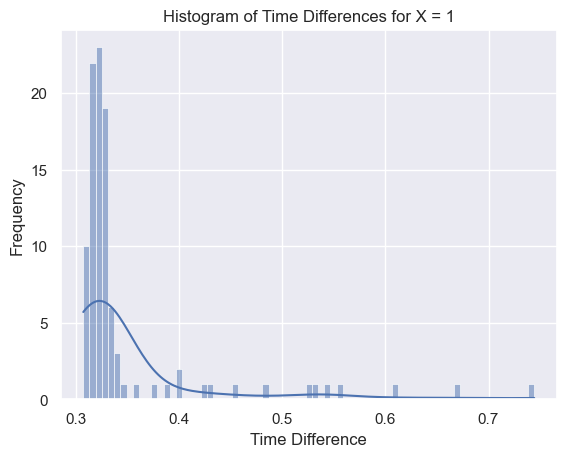

X = 2: Mean time difference = 0.42 ± 0.10
X = 2: Median time difference = 0.39 (IQR: 0.02)


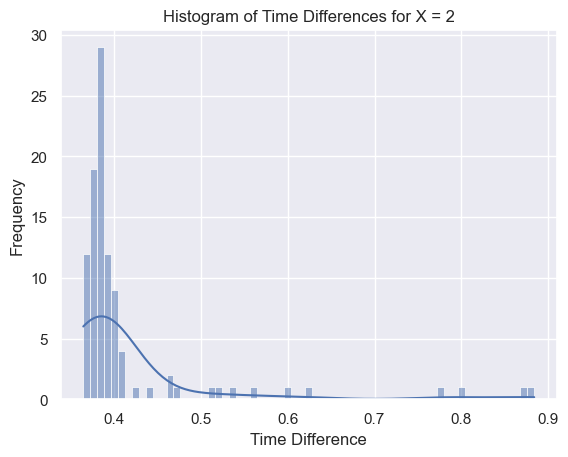

X = 3: Mean time difference = 0.69 ± 2.14
X = 3: Median time difference = 0.43 (IQR: 0.03)


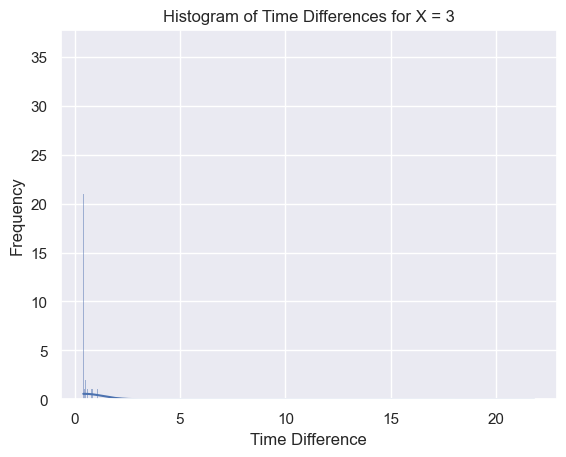

X = 4: Mean time difference = 0.85 ± 2.55
X = 4: Median time difference = 0.51 (IQR: 0.11)


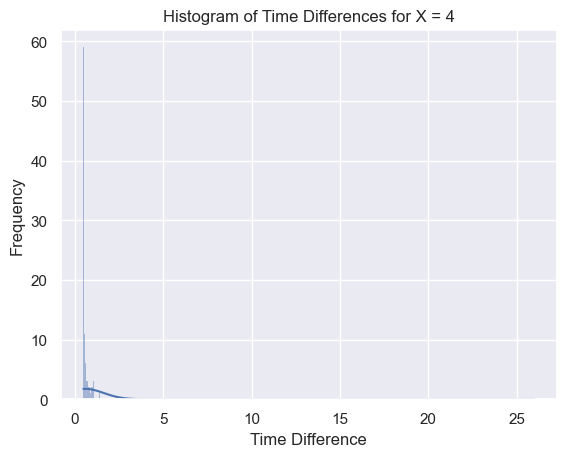

X = 5: Mean time difference = 1.04 ± 2.42
X = 5: Median time difference = 0.75 (IQR: 0.07)


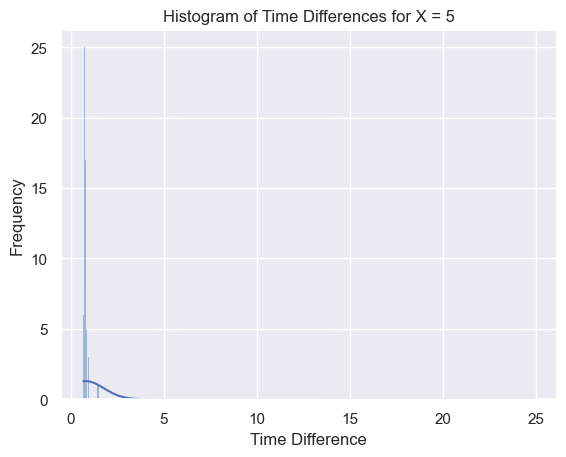

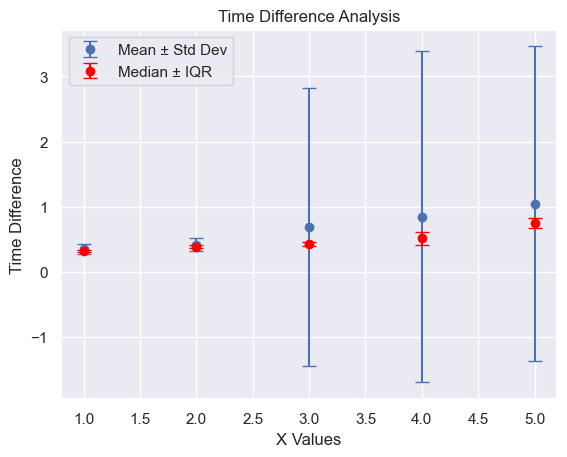

In [151]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Directory where JSON files are stored
data_dir = 'results_error_bands'

# Initialize lists to store the data
x_values_GC = []
mean_time_differences_GC = []
std_devs_time_differences_GC = []
medians = []
iqrs = []

# Process each JSON file
for x in range(1, 6):  
    file_path = os.path.join(data_dir, f'results_pytorch_concurrent_{x}_globus-torch.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Collect time differences for the current X value
    time_differences_GC = []
    for iteration in data.values():
        start_times = [float(func_data['start_time']) for func_data in iteration.values()]
        end_times = [float(func_data['end_time']) for func_data in iteration.values()]
        
        earliest_start_time = min(start_times)
        latest_end_time = max(end_times)
        
        time_difference = latest_end_time - earliest_start_time
        if time_difference < 0:
            print(f"Warning: Negative time difference detected for X = {x}, Iteration = {iteration}")
        
        time_differences_GC.append(time_difference)
    
    # Calculate mean and standard deviation of time differences
    mean_time_difference = np.mean(time_differences_GC)
    std_dev_time_difference = np.std(time_differences_GC, ddof=1)
    
    # Calculate median and IQR of time differences
    median_time_difference_GC = np.median(time_differences_GC)
    iqr_time_difference_GC = np.percentile(time_differences_GC, 75) - np.percentile(time_differences_GC, 25)
    
    # Print the mean time difference with only 2 decimal places
    print(f'X = {x}: Mean time difference = {mean_time_difference:.2f} ± {std_dev_time_difference:.2f}')
    print(f'X = {x}: Median time difference = {median_time_difference_GC:.2f} (IQR: {iqr_time_difference_GC:.2f})')
    
    # Append to the lists
    x_values_GC.append(x)
    mean_time_differences_GC.append(mean_time_difference)
    std_devs_time_differences_GC.append(std_dev_time_difference)
    medians.append(median_time_difference_GC)
    iqrs.append(iqr_time_difference_GC)

    # Plotting the histogram for the current X value
    plt.figure()
    sns.histplot(time_differences_GC, kde=True)
    plt.title(f'Histogram of Time Differences for X = {x}')
    plt.xlabel('Time Difference')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the results
plt.errorbar(x_values_GC, mean_time_differences_GC, yerr=std_devs_time_differences_GC, fmt='o', capsize=5, label='Mean ± Std Dev')
plt.errorbar(x_values_GC, medians, yerr=iqrs, fmt='o', capsize=5, color='red', label='Median ± IQR')
plt.xlabel('X Values')
plt.ylabel('Time Difference')
plt.title('Time Difference Analysis')
plt.legend()
plt.show()


# Trying to use the mdeian and IQR to plot the error bars

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_FUNCTIONS = 12

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Directory where JSON files are stored
data_dir = 'results_error_bands'

# Initialize lists to store the data
x_values_GC = []
median_time_difference_GCs_GC_GC = []
iqrs_time_differences_GC_GC = []

# Process each JSON file
for x in range(1, NUM_FUNCTIONS + 1):  
    file_path = os.path.join(data_dir, f'results_pytorch_concurrent_{x}_globus-torch.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Collect time differences for the current X value
    time_differences_GC = []
    for iteration in data.values():
        start_times = [float(func_data['start_time']) for func_data in iteration.values()]
        end_times = [float(func_data['end_time']) for func_data in iteration.values()]
        
        earliest_start_time = min(start_times)
        latest_end_time = max(end_times)
        
        time_difference_GC = latest_end_time - earliest_start_time
        if time_difference_GC < 0:
            print(f"Warning: Negative time difference detected for X = {x}, Iteration = {iteration}")
            
        time_differences_GC.append(time_difference_GC)
    
    # Calculate median and IQR of time differences
    median_time_difference_GC = np.median(time_differences_GC)
    iqr_time_difference_GC = np.percentile(time_differences_GC, 75) - np.percentile(time_differences_GC, 25)
    
    # Print the median time difference with only 2 decimal places
    print(f'X = {x}: Median time difference = {median_time_difference_GC:.2f} (IQR: {iqr_time_difference_GC:.2f})')
    
    # Append to the lists
    x_values_GC.append(x)
    median_time_difference_GCs_GC_GC.append(median_time_difference_GC)
    iqrs_time_differences_GC_GC.append(iqr_time_difference_GC)

    


X = 1: Median time difference = 0.32 (IQR: 0.01)
X = 2: Median time difference = 0.39 (IQR: 0.02)
X = 3: Median time difference = 0.43 (IQR: 0.03)
X = 4: Median time difference = 0.51 (IQR: 0.11)
X = 5: Median time difference = 0.75 (IQR: 0.07)
X = 6: Median time difference = 0.84 (IQR: 0.07)
X = 7: Median time difference = 0.87 (IQR: 0.13)
X = 8: Median time difference = 0.98 (IQR: 0.17)
X = 9: Median time difference = 1.26 (IQR: 0.18)
X = 10: Median time difference = 1.29 (IQR: 0.24)
X = 11: Median time difference = 1.27 (IQR: 0.03)
X = 12: Median time difference = 1.39 (IQR: 0.11)


In [ ]:
# Convert lists to numpy arrays for plotting
median_time_difference_GCs_GC_GC = np.array(median_time_difference_GCs_GC_GC)
iqrs_time_differences_GC_GC = np.array(iqrs_time_differences_GC_GC)

# Plot the data with error bars
plt.figure(figsize=(10, 6))

x = np.arange(1, len(median_time_difference_GCs_GC_GC) + 1)
plt.plot(x, median_time_difference_GCs_GC_GC, 'r-', label='Median time execution of all functions')
plt.fill_between(x, median_time_difference_GCs_GC_GC - iqrs_time_differences_GC_GC / 2, 
                 median_time_difference_GCs_GC_GC + iqrs_time_differences_GC_GC / 2, color='r', alpha=0.2)

plt.xlabel('Number of Functions')
plt.ylabel('Median Time Execution of all Functions')
plt.title('Time Execution of all Functions vs Number of Functions with IQR')
plt.xticks(ticks=range(1, 7))
plt.legend()
plt.show()


# Trying seaborn

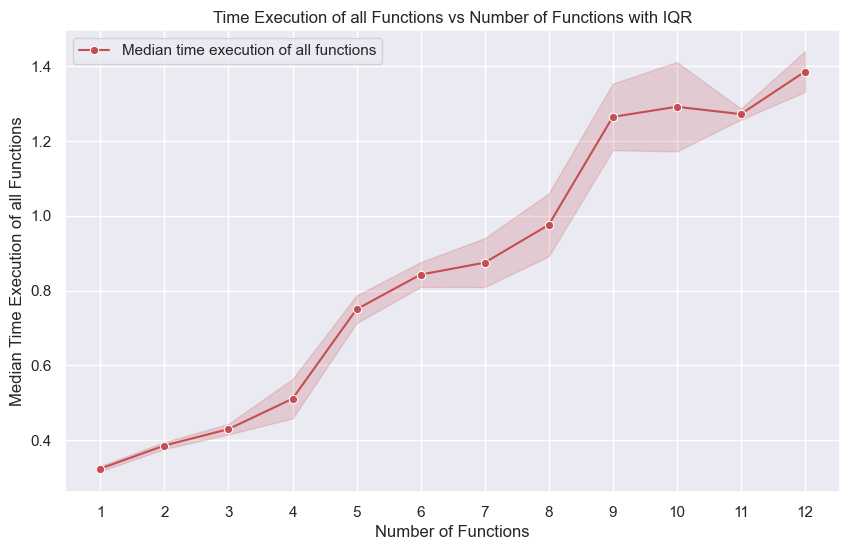

In [2]:
# Convert lists to numpy arrays for plotting
median_time_difference_GCs_GC_GC = np.array(median_time_difference_GCs_GC_GC)
iqrs_time_differences_GC_GC = np.array(iqrs_time_differences_GC_GC)

# Create a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({
    'Number of Functions': x_values_GC,
    'Median Time Execution': median_time_difference_GCs_GC_GC,
    'IQR': iqrs_time_differences_GC_GC
})

# Plot the data with error bars using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Number of Functions', y='Median Time Execution', marker='o', label='Median time execution of all functions', color='r')

# Add the fill between for IQR
plt.fill_between(data['Number of Functions'], 
                 data['Median Time Execution'] - data['IQR'] / 2, 
                 data['Median Time Execution'] + data['IQR'] / 2, color='r', alpha=0.2)

plt.xlabel('Number of Functions')
plt.ylabel('Median Time Execution of all Functions')
plt.title('Time Execution of all Functions vs Number of Functions with IQR')
plt.xticks(ticks=range(1, NUM_FUNCTIONS + 1))
plt.legend()
plt.show()